1. Translate a triangle with translation factor tx and ty. 

In [1]:
# Define the triangle vertices
A = (2, 3)
B = (4, 7)
C = (6, 3)

# Translation factors
tx = 3
ty = 2

# Function to translate a point
def translate(point, tx, ty):
    x, y = point
    return (x + tx, y + ty)

# Translate all vertices
A_prime = translate(A, tx, ty)
B_prime = translate(B, tx, ty)
C_prime = translate(C, tx, ty)

print("Original Triangle: A =", A, "B =", B, "C =", C)
print("Translated Triangle: A' =", A_prime, "B' =", B_prime, "C' =", C_prime)

Original Triangle: A = (2, 3) B = (4, 7) C = (6, 3)
Translated Triangle: A' = (5, 5) B' = (7, 9) C' = (9, 5)


2. scale a rectangle about a origin.

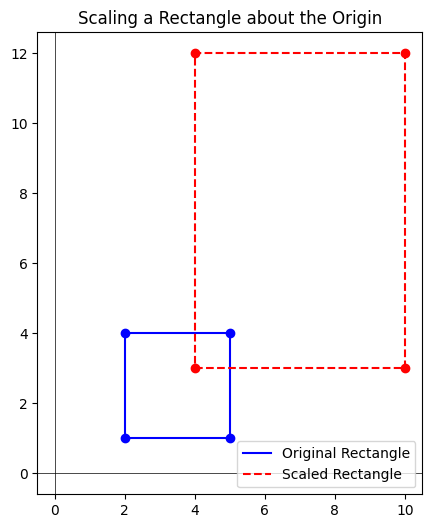

In [2]:
import matplotlib.pyplot as plt

# Original rectangle vertices (x, y)
rectangle = [(2, 1), (5, 1), (5, 4), (2, 4)]

# Scaling factors
Sx = 2   # scale in x-direction
Sy = 3   # scale in y-direction

# Function to scale a point about origin
def scale(point, Sx, Sy):
    x, y = point
    return (x * Sx, y * Sy)

# Scale all vertices
scaled_rectangle = [scale(p, Sx, Sy) for p in rectangle]

# Close the rectangles for plotting
rect_x, rect_y = zip(*(rectangle + [rectangle[0]]))
scaled_x, scaled_y = zip(*(scaled_rectangle + [scaled_rectangle[0]]))

# Plot original and scaled rectangles
plt.figure(figsize=(6,6))
plt.plot(rect_x, rect_y, 'b-', label="Original Rectangle")
plt.plot(scaled_x, scaled_y, 'r--', label="Scaled Rectangle")
plt.scatter(*zip(*rectangle), color='blue')
plt.scatter(*zip(*scaled_rectangle), color='red')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Scaling a Rectangle about the Origin")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

3. Rotate a triangle about a origin.

Original Triangle: [(2, 1), (4, 1), (3, 3)]
Rotated Triangle: [(0.7071067811865476, 2.121320343559643), (2.121320343559643, 3.5355339059327378), (0.0, 4.242640687119286)]


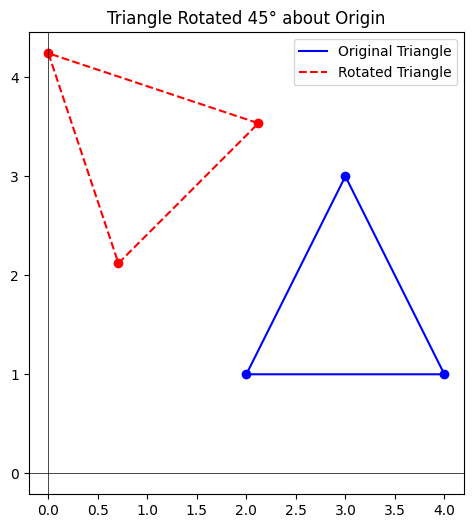

In [1]:
import math
import matplotlib.pyplot as plt

# Original triangle vertices
triangle = [(2, 1), (4, 1), (3, 3)]

# Rotation angle (in degrees)
theta = 45
theta_rad = math.radians(theta)

# Rotation function
def rotate(point, theta_rad):
    x, y = point
    x_new = x * math.cos(theta_rad) - y * math.sin(theta_rad)
    y_new = x * math.sin(theta_rad) + y * math.cos(theta_rad)
    return (x_new, y_new)

# Rotate all vertices
rotated_triangle = [rotate(p, theta_rad) for p in triangle]

print("Original Triangle:", triangle)
print("Rotated Triangle:", rotated_triangle)

# Plotting
orig_x, orig_y = zip(*(triangle + [triangle[0]]))
rot_x, rot_y = zip(*(rotated_triangle + [rotated_triangle[0]]))

plt.figure(figsize=(6,6))
plt.plot(orig_x, orig_y, 'b-', label="Original Triangle")
plt.plot(rot_x, rot_y, 'r--', label="Rotated Triangle")
plt.scatter(*zip(*triangle), color='blue')
plt.scatter(*zip(*rotated_triangle), color='red')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title(f"Triangle Rotated {theta}° about Origin")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

4. Reflect a triangle 
a. about x-axis
b. about origin
c. about y=x
d. about y=mx+c

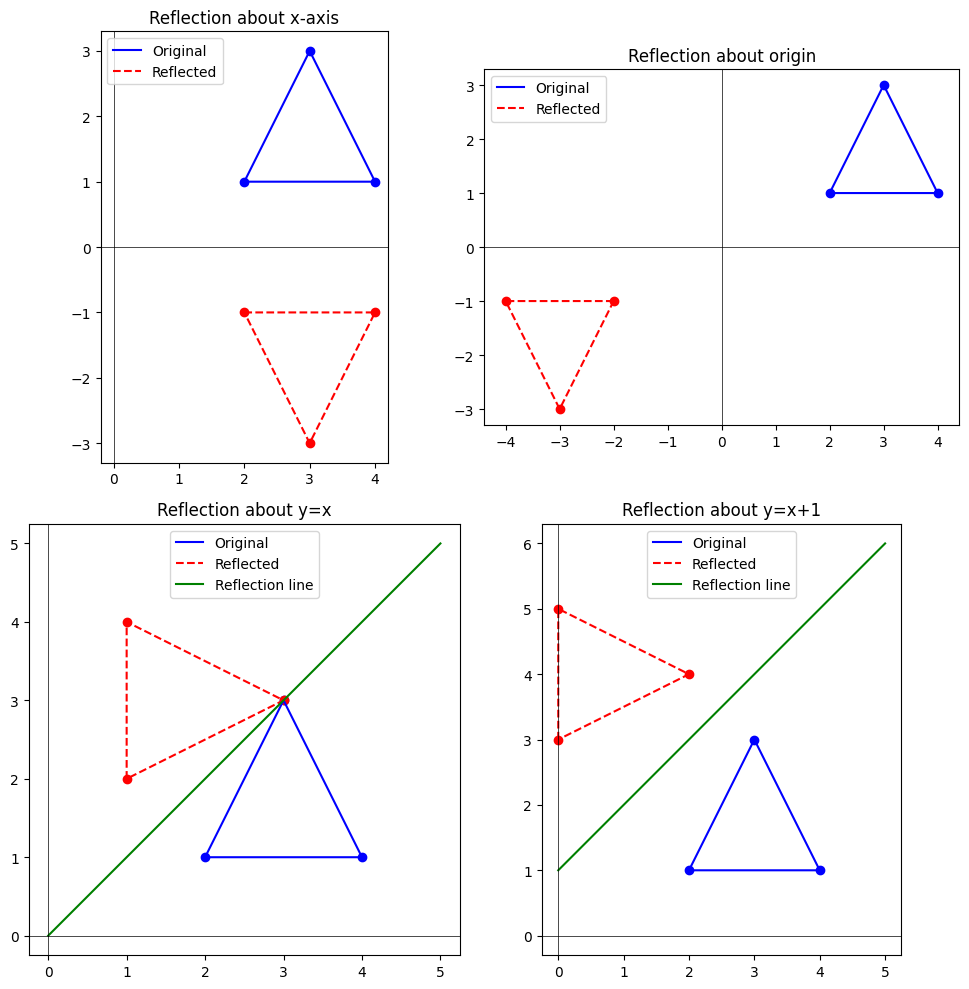

In [5]:
import math
import matplotlib.pyplot as plt

# Original triangle vertices
triangle = [(2,1), (4,1), (3,3)]

# --- Reflection functions ---
def reflect_x(point):
    x, y = point
    return (x, -y)

def reflect_origin(point):
    x, y = point
    return (-x, -y)

def reflect_y_eq_x(point):
    x, y = point
    return (y, x)

def reflect_about_line(point, m, c):
    """Reflect point about line y = mx + c"""
    theta = math.atan(m)
    # Translate line to origin
    x, y = point
    y -= c
    # Rotate line to x-axis
    x_r = x*math.cos(-theta) - y*math.sin(-theta)
    y_r = x*math.sin(-theta) + y*math.cos(-theta)
    # Reflect about x-axis
    y_r = -y_r
    # Rotate back
    x_b = x_r*math.cos(theta) - y_r*math.sin(theta)
    y_b = x_r*math.sin(theta) + y_r*math.cos(theta)
    # Translate back
    y_b += c
    return (x_b, y_b)

# --- Apply reflections ---
triangle_x = [reflect_x(p) for p in triangle]
triangle_origin = [reflect_origin(p) for p in triangle]
triangle_yx = [reflect_y_eq_x(p) for p in triangle]
triangle_line = [reflect_about_line(p, m=1, c=1) for p in triangle]  # Example line y=x+1

# --- Helper for plotting ---
def plot_triangle(ax, orig, refl, title, line=None):
    orig_x, orig_y = zip(*(orig + [orig[0]]))
    refl_x, refl_y = zip(*(refl + [refl[0]]))
    ax.plot(orig_x, orig_y, 'b-', label="Original")
    ax.plot(refl_x, refl_y, 'r--', label="Reflected")
    ax.scatter(*zip(*orig), color='blue')
    ax.scatter(*zip(*refl), color='red')
    if line:
        lx, ly = line
        ax.plot(lx, ly, 'g-', label="Reflection line")
    ax.set_title(title)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# --- Plot all four reflections ---
fig, axs = plt.subplots(2,2, figsize=(10,10))

plot_triangle(axs[0,0], triangle, triangle_x, "Reflection about x-axis")
plot_triangle(axs[0,1], triangle, triangle_origin, "Reflection about origin")
plot_triangle(axs[1,0], triangle, triangle_yx, "Reflection about y=x", line=([0,5],[0,5]))
plot_triangle(axs[1,1], triangle, triangle_line, "Reflection about y=x+1", line=([0,5],[0+1,5+1]))

plt.tight_layout()
plt.show()

5. Shear a rectangle 
a. about x direction
b. towards both direction

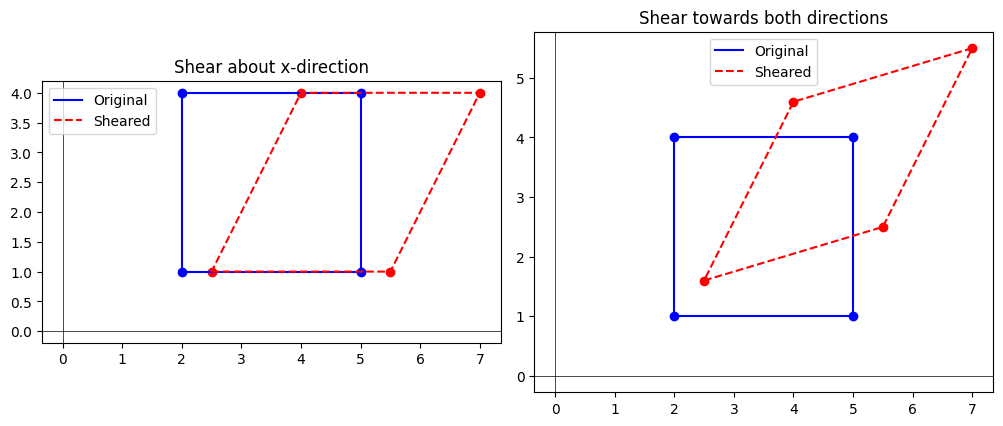

In [6]:
import matplotlib.pyplot as plt

# Original rectangle vertices
rectangle = [(2,1), (5,1), (5,4), (2,4)]

# Shear factors
kx = 0.5   # shear in x-direction
ky = 0.3   # shear in y-direction

def shear_x(point, kx):
    x, y = point
    return (x + kx*y, y)

def shear_xy(point, kx, ky):
    x, y = point
    return (x + kx*y, y + ky*x)

# Apply shears
rect_shear_x = [shear_x(p, kx) for p in rectangle]
rect_shear_xy = [shear_xy(p, kx, ky) for p in rectangle]

# Plot helper
def plot_rect(ax, orig, transformed, title):
    ox, oy = zip(*(orig + [orig[0]]))
    tx, ty = zip(*(transformed + [transformed[0]]))
    ax.plot(ox, oy, 'b-', label="Original")
    ax.plot(tx, ty, 'r--', label="Sheared")
    ax.scatter(*zip(*orig), color='blue')
    ax.scatter(*zip(*transformed), color='red')
    ax.set_title(title)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Plot both cases
fig, axs = plt.subplots(1,2, figsize=(10,5))
plot_rect(axs[0], rectangle, rect_shear_x, "Shear about x-direction")
plot_rect(axs[1], rectangle, rect_shear_xy, "Shear towards both directions")
plt.tight_layout()
plt.show()